In [2]:
import yaml
import pandas as pd
import numpy as np
import gc   # For manual garbage collection

f = open(r'../python/params-oct2021-sep2022-new-equation-12212023.yaml')
parameters = yaml.safe_load(f)
f.close()

class vehicleParams():
	def __init__(self, **entries):
		self.__dict__.update(entries)

# Read only required columns for computation from trajectories df. Change this to the actual column names you use.
df = pd.read_csv(r'../../data/tidy/large/trajectories-mapped-powertrain-weight-grade-oct2021-sep2022.csv', delimiter=',', skiprows=0, low_memory=False)


df.speed = df.speed *0.44704 # Convert from mph to m/s
df.rename(columns={"speed": "Speed", "acc": "Acceleration", "VehiclWeight(lb)": "Vehicle_mass"}, inplace=True)
df = df.fillna(0)

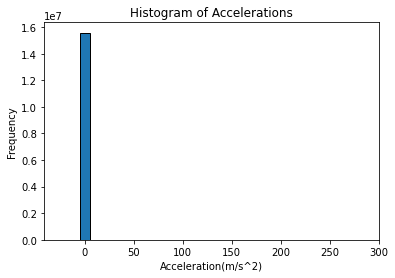

In [4]:
import matplotlib.pyplot as plt
plt.hist(df['Acceleration'], bins=30, edgecolor='black') 
plt.xlabel('Acceleration(m/s^2)')
plt.ylabel('Frequency')
plt.title('Histogram of Accelerations')
plt.show()

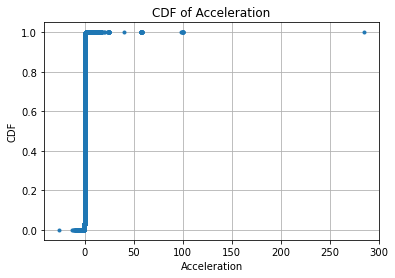

In [5]:
import matplotlib.pyplot as plt
import numpy as np

data = df['Acceleration']

# Calculate the CDF values
data_sorted = np.sort(data)
cdf = np.arange(1, len(data_sorted)+1) / len(data_sorted)

# Create a CDF plot
plt.plot(data_sorted, cdf, marker='.', linestyle='none')
plt.xlabel('Acceleration')
plt.ylabel('CDF')
plt.title('CDF of Acceleration')
plt.grid(True)
plt.show()


In [13]:
# Calculating the 1st and 99th percentiles
quantile_1 = df['Acceleration'].quantile(0.0001)
quantile_99 = df['Acceleration'].quantile(0.9999)

# Printing only the 1st and 99th percentile values
print("quantile_1",quantile_1)
print("quantile_99",quantile_99)

quantile_1 -1.676924790528887
quantile_99 3.890559801731388
